In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Cargar CSV en un DataFrame
df = pd.read_csv("processed_data/athlete_events_clean.csv")

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No medal
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178501,135569,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No medal
178502,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No medal
178503,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal
178504,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No medal


In [4]:
# Primero dividir las variables por tipo:

variables_num = ['Age', 'Height', 'Weight']

variables_cat = ['Team','NOC','Games','City','Sport','Event','Name','Sex','Season','ID','Year']
variables_cat1 = ['Team','NOC','Games','City','Sport','Event','Name','Sex','Season']

target = ['Medal']

In [5]:
peso_alto = df[df['Weight'] > 180].shape[0]
peso_bajo = df[df['Weight'] < 30].shape[0]
edad_mayor = df[df['Age'] > 60].shape[0]
altura_alta = df[df['Height'] > 220].shape[0]
altura_baja = df[df['Height'] < 135].shape[0]

print(f"Número de atletas con peso > 180 kg: {peso_alto}")
print(f"Número de atletas con peso < 30 kg: {peso_bajo}")
print(f"Número de atletas con mas de 60 años: {edad_mayor}")
print(f"Número de atletas con altura > 220cm : {altura_alta}")
print(f"Número de atletas con altura < 120cm : {altura_baja}")

#Vemos que hay muy pocos valores con estas caracteristicas, los trataeremos como outliers y los eliminaremos.

Número de atletas con peso > 180 kg: 6
Número de atletas con peso < 30 kg: 19
Número de atletas con mas de 60 años: 38
Número de atletas con altura > 220cm : 11
Número de atletas con altura < 120cm : 20


In [6]:
df = df[df['Age'] <= 60]
df = df[df['Weight'] < 180]
df = df[df['Weight'] > 30]
df = df[df['Height'] < 220]
df = df[df['Height'] > 135]

<Axes: xlabel='Medal', ylabel='Age'>

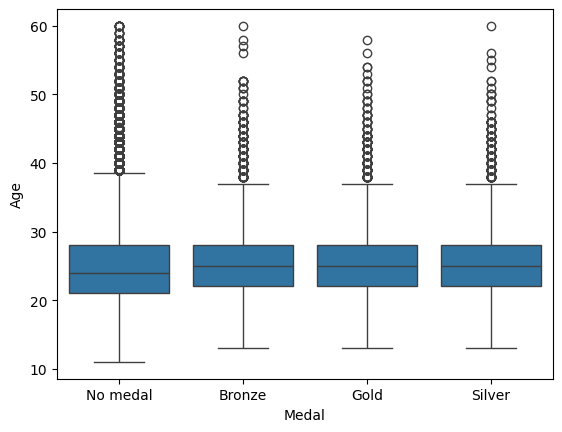

In [7]:
sns.boxplot(x='Medal', y='Age', data=df)

#Vemos es algo mas dificil conseguir una medalla cuando se es algo mas joven. Y que la edad perfecta es alrededor de los 23-24 años.

<Axes: xlabel='Medal', ylabel='Height'>

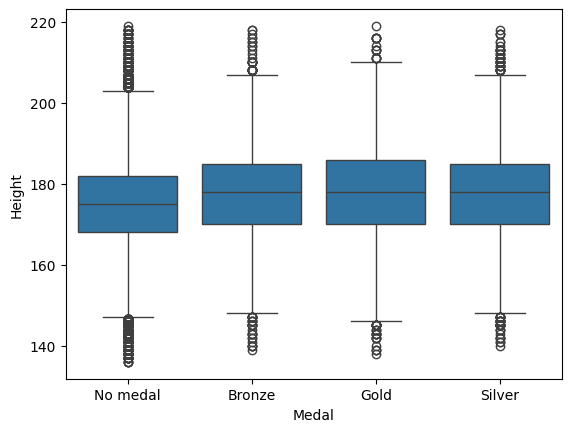

In [8]:
sns.boxplot(x='Medal', y='Height', data=df)

#La media de altura es mas alta para los atletas con medalla que los que no tienen medalla.

<Axes: xlabel='Medal', ylabel='Weight'>

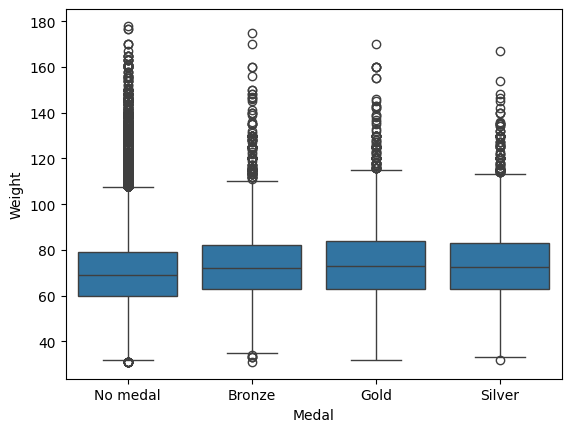

In [9]:
sns.boxplot(x='Medal', y='Weight', data=df)

#De igual forma, el peso parece tener una correlación positiva con el Hecho de ganar una medalla.

C:\Users\Alvar\AppData\Local\Temp\ipykernel_23188\3970773557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Medal', y=col, data=df, palette="muted", inner="quartile")


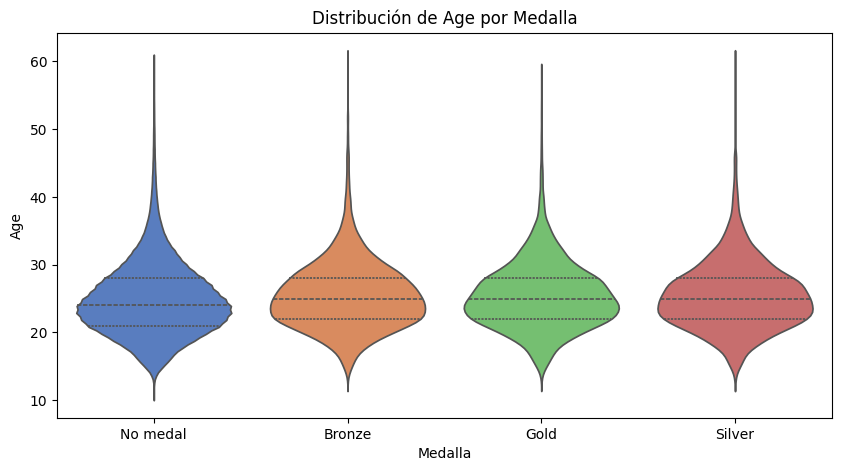

C:\Users\Alvar\AppData\Local\Temp\ipykernel_23188\3970773557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Medal', y=col, data=df, palette="muted", inner="quartile")


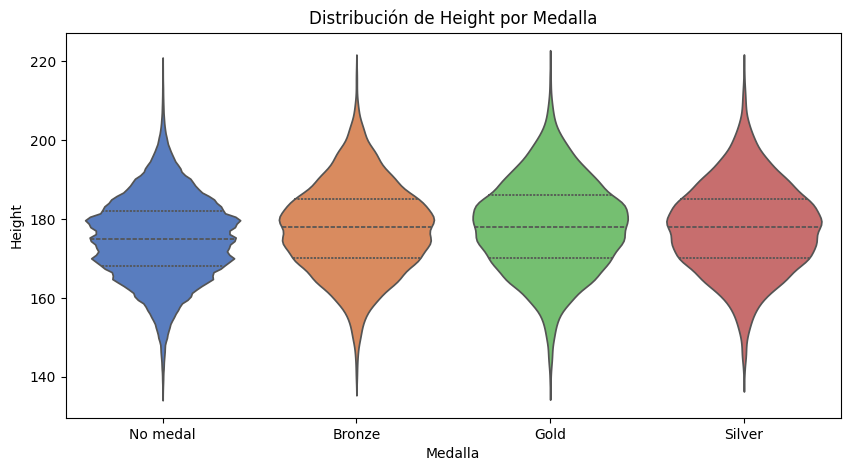

C:\Users\Alvar\AppData\Local\Temp\ipykernel_23188\3970773557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Medal', y=col, data=df, palette="muted", inner="quartile")


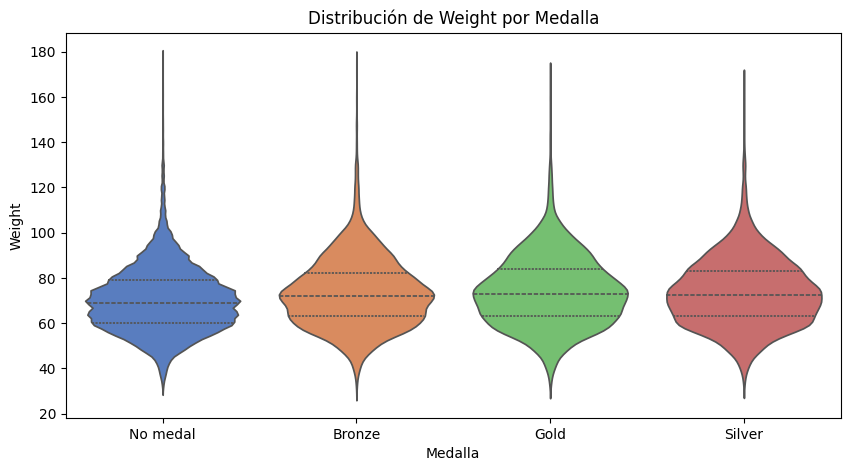

In [10]:
#Violin plot

for col in variables_num:
    plt.figure(figsize=(10,5))
    sns.violinplot(x='Medal', y=col, data=df, palette="muted", inner="quartile")
    plt.title(f"Distribución de {col} por Medalla")
    plt.xlabel("Medalla")
    plt.ylabel(col)
    plt.show()

In [11]:
#Conteo de medallas por país

pd.crosstab(df['Team'], df['Medal'])

Medal,Bronze,Gold,No medal,Silver
Team,,,,
Afghanistan,2,0,42,0
Albania,0,0,70,0
Algeria,8,5,518,4
Andorra,0,0,168,0
Angola,0,0,267,0
...,...,...,...,...
Vietnam,0,1,152,3
Virgin Islands,0,0,330,1
Yemen,0,0,48,0


In [12]:
#Conteo de medallas por deporte

pd.crosstab(df['Sport'], df['Medal'])

Medal,Bronze,Gold,No medal,Silver
Sport,,,,
Alpine Skiing,103,105,6119,105
Archery,72,72,1852,72
Athletics,686,706,22009,699
Badminton,60,54,1289,54
Basketball,271,273,2181,273
Beach Volleyball,24,24,492,24
Biathlon,128,129,4309,130
Bobsleigh,84,82,1929,78
Boxing,282,141,3235,140


In [13]:
#Conteo de medallas por genero

pd.crosstab(df['Sex'], df['Medal'])

Medal,Bronze,Gold,No medal,Silver
Sex,,,,
F,3198,3145,53276,3138
M,5134,4901,100740,4823


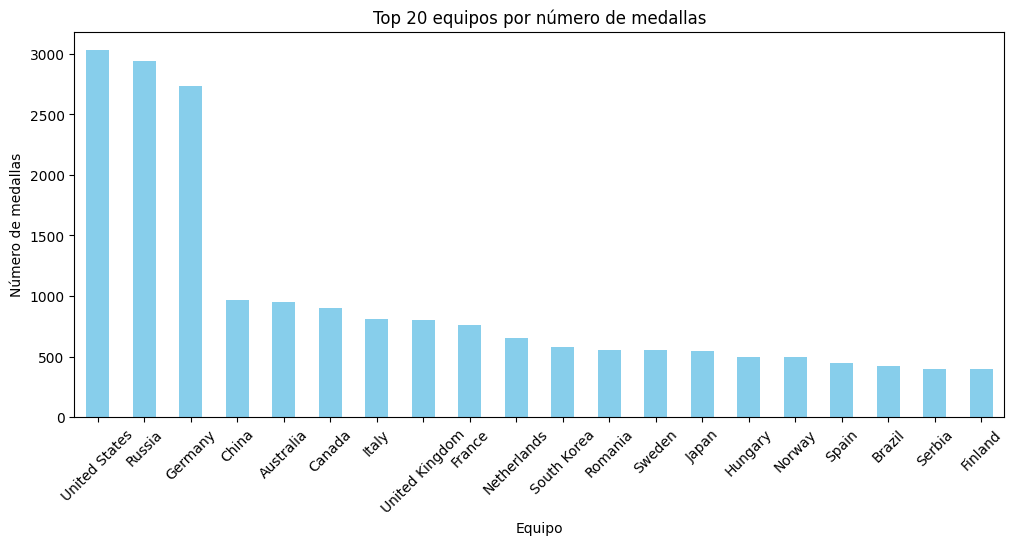

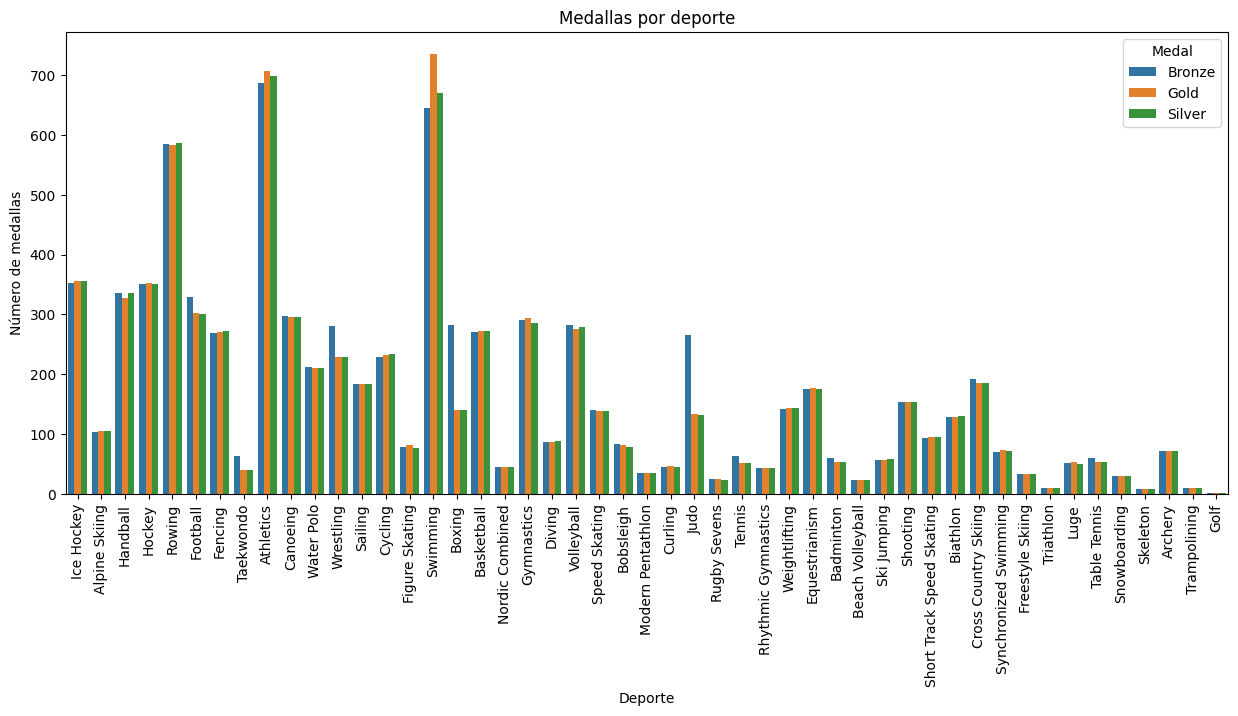

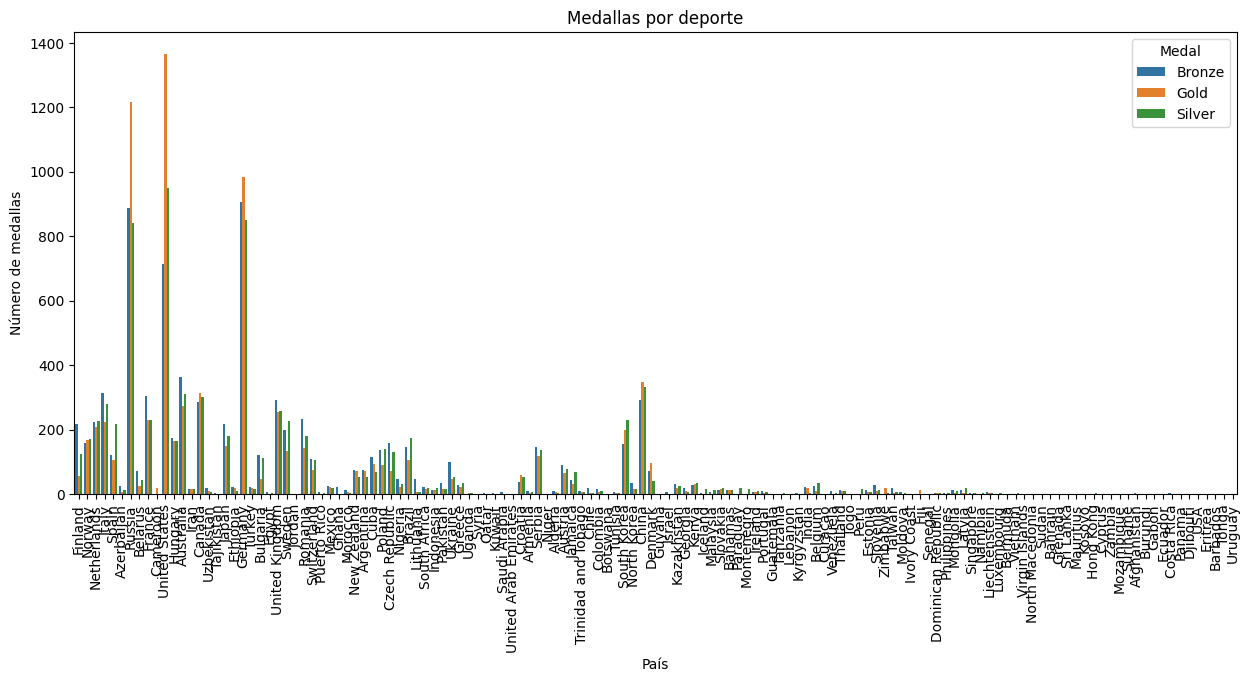

In [14]:
# Filtrar solo filas con medalla válida
df1 = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Top 20 equipos por número de medallas
df1.groupby('Team')['Medal'].count().sort_values(ascending=False).head(20).plot(
    kind='bar', figsize=(12,5), color='skyblue'
)
plt.title("Top 20 equipos por número de medallas")
plt.ylabel("Número de medallas")
plt.xlabel("Equipo")
plt.xticks(rotation=45)
plt.show()

# Medallas por deporte
plt.figure(figsize=(15,6))
sns.countplot(x='Sport', hue='Medal', data=df1)
plt.title("Medallas por deporte")
plt.xticks(rotation=90)
plt.xlabel("Deporte")
plt.ylabel("Número de medallas")
plt.show()

# Medallas por pais
plt.figure(figsize=(15,6))
sns.countplot(x='Team', hue='Medal', data=df1)
plt.title("Medallas por deporte")
plt.xticks(rotation=90)
plt.xlabel("País")
plt.ylabel("Número de medallas")
plt.show()

In [15]:
#Edades promedio por deporte (mas altas y mas bajas):

top10_age_high = round(df.groupby('Sport')['Age'].mean().sort_values(ascending=False).head(10),1)
print(top10_age_high)

top10_age_low = round(df.groupby('Sport')['Age'].mean().sort_values(ascending=True).head(10),1)
print(top10_age_low)

Sport
Equestrianism       34.4
Shooting            31.6
Curling             31.0
Golf                29.5
Beach Volleyball    29.1
Skeleton            29.0
Sailing             28.7
Bobsleigh           28.5
Triathlon           27.9
Biathlon            26.5
Name: Age, dtype: float64
Sport
Rhythmic Gymnastics          18.7
Swimming                     20.8
Gymnastics                   20.9
Diving                       22.3
Figure Skating               22.3
Synchronized Swimming        22.4
Short Track Speed Skating    22.8
Ski Jumping                  23.0
Alpine Skiing                23.2
Boxing                       23.4
Name: Age, dtype: float64


In [16]:
#Pesos y alturas promedio por Pais (mas altas y mas bajas):

top10_team_Height_high = round(df.groupby('Team')['Height'].mean().sort_values(ascending=False).head(10),1)
print(top10_team_Height_high)

top10_team_Height_low = round(df.groupby('Team')['Height'].mean().sort_values(ascending=True).head(10),1)
print(top10_team_Height_low)

top10_team_Weight_high = round(df.groupby('Team')['Weight'].mean().sort_values(ascending=False).head(10),1)
print(top10_team_Weight_high)

top10_team_Weight_low = round(df.groupby('Team')['Weight'].mean().sort_values(ascending=True).head(10),1)
print(top10_team_Weight_low)


Team
Croatia        183.7
Montenegro     183.6
Serbia         182.3
Lithuania      182.1
Iceland        181.1
Senegal        180.7
Mali           180.4
Denmark        180.1
Tonga          179.9
Netherlands    179.8
Name: Height, dtype: float64
Team
North Korea    161.4
East Timor     161.4
Micronesia     161.5
Nepal          163.8
Vietnam        165.1
Maldives       165.5
Bangladesh     166.1
Lesotho        166.1
Myanmar        166.2
Palau          166.2
Name: Height, dtype: float64
Team
Nauru                     95.8
Montenegro                84.8
Tonga                     82.7
Croatia                   81.7
Samoa                     81.4
Iceland                   78.6
Kiribati                  78.4
Latvia                    78.2
Serbia                    78.1
Bosnia and Herzegovina    77.9
Name: Weight, dtype: float64
Team
East Timor     55.2
Maldives       55.3
Ethiopia       56.0
Eritrea        56.3
North Korea    57.1
Vietnam        57.5
Nepal          57.5
Myanmar        58.0
Lao

<Axes: xlabel='Sex', ylabel='Weight'>

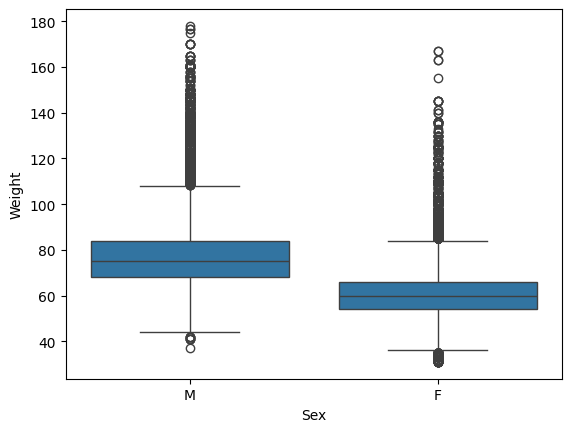

In [17]:
#Boxplots de peso por sexo
sns.boxplot(x='Sex', y='Weight', data=df)

<Axes: xlabel='Sex', ylabel='Height'>

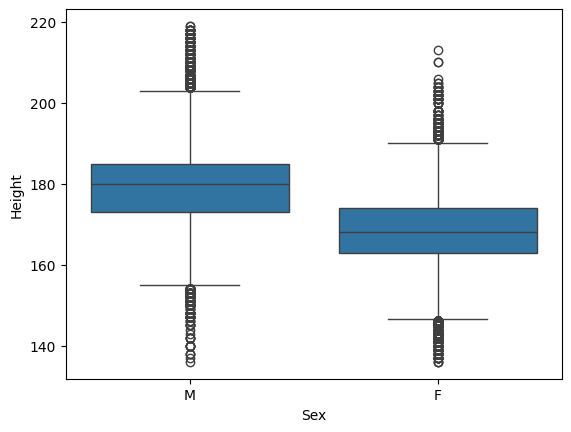

In [18]:
#Boxplots de altura por sexo
sns.boxplot(x='Sex', y='Height', data=df)

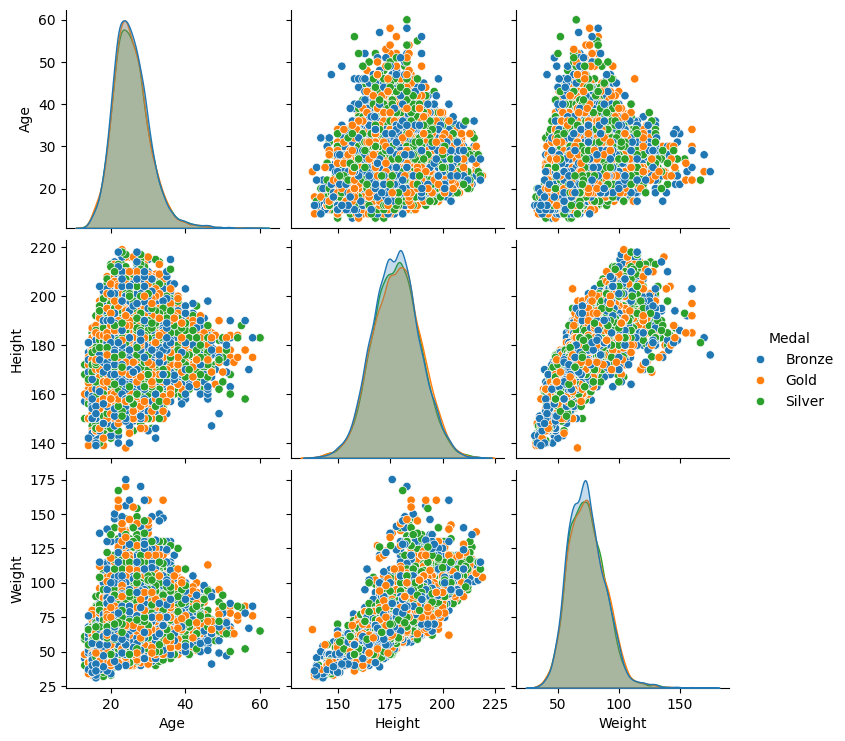

In [19]:
sns.pairplot(df1[['Age','Height','Weight','Medal']], hue='Medal')

In [20]:
medal_map = {'No medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}
df['Medal_num'] = df['Medal'].map(medal_map)

In [21]:
X = df.drop(['Medal', 'Medal_num'], axis=1)
y = df['Medal_num']

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
num_cols1 = ["Age","Height","Weight"]

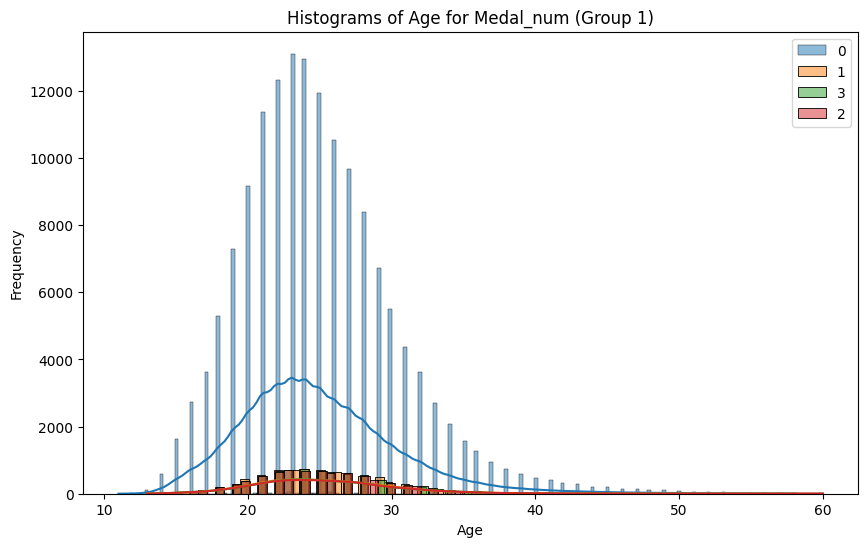

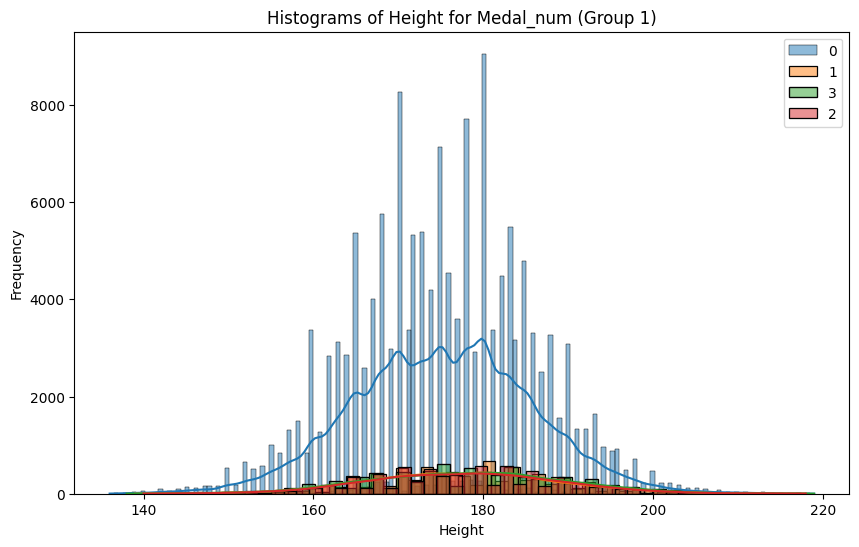

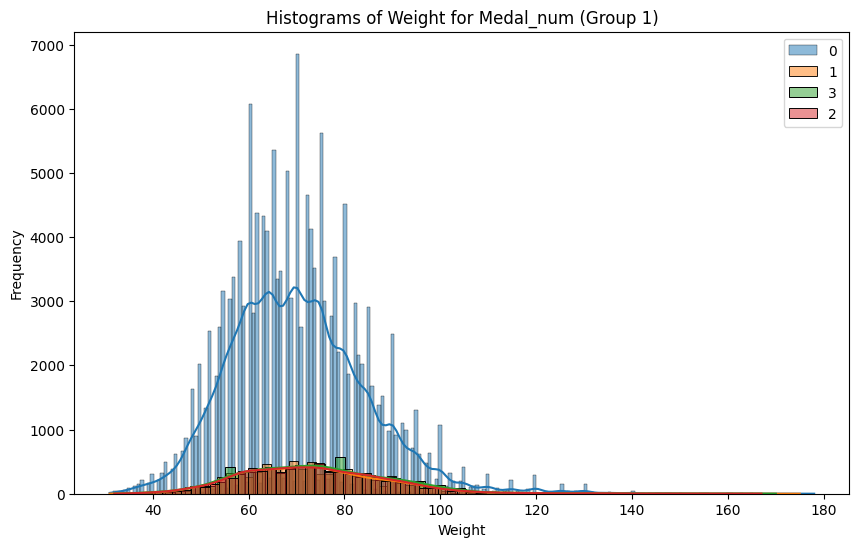

In [22]:
# Visualización de histogramas por grupos

target = ['Medal_num']  # columna para agrupar

import bootcampviztools as bt


for col in num_cols1:
    bt.plot_grouped_histograms(
        df,
        cat_col=target[0], 
        num_col=col,        
        group_size=4
    )

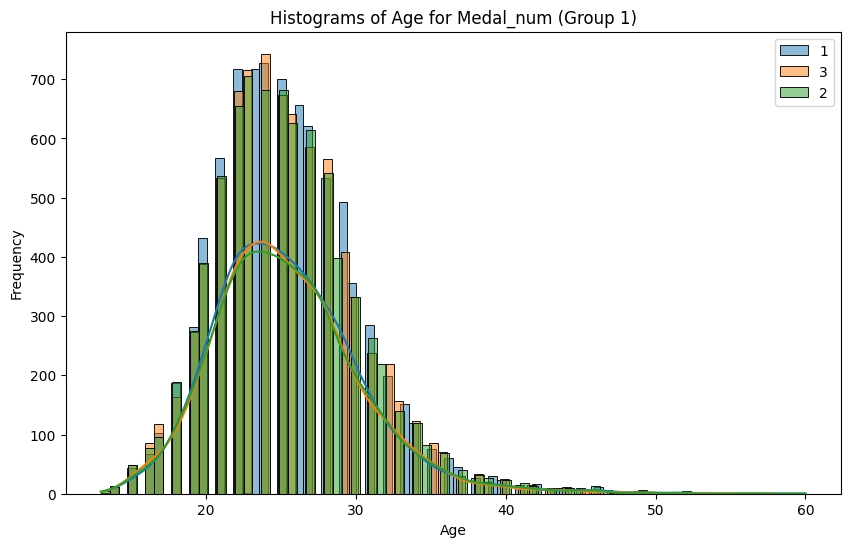

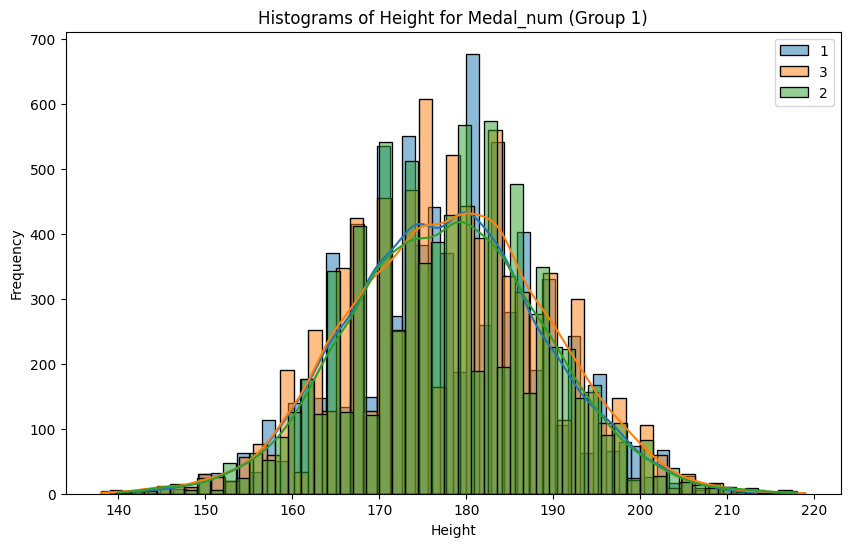

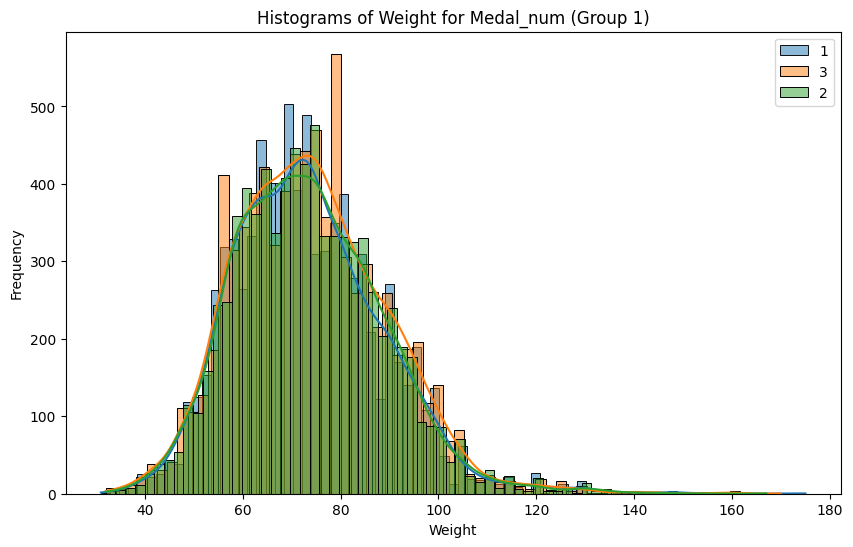

In [23]:
# Visualización de histogramas por grupos excluyendo las no medallas.

df_medallas = df[df['Medal_num'] != 0]

target = ['Medal_num']  # columna para agrupar


for col in num_cols1:
    bt.plot_grouped_histograms(
        df_medallas,
        cat_col=target[0], 
        num_col=col,        
        group_size=4
    )

                Age    Height    Weight  Medal_num
Age        1.000000  0.152688  0.217821   0.030823
Height     0.152688  1.000000  0.799010   0.078917
Weight     0.217821  0.799010  1.000000   0.074585
Medal_num  0.030823  0.078917  0.074585   1.000000


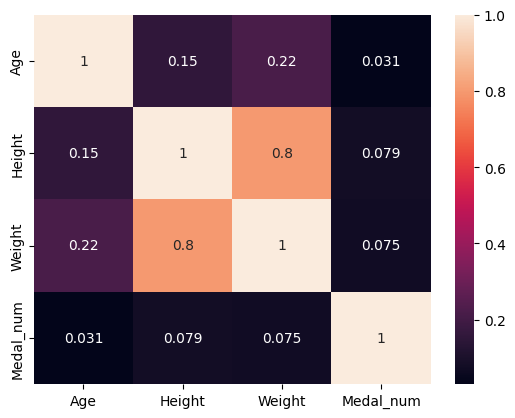

In [24]:
medal_map = {'No medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}
df['Medal_num'] = df['Medal'].map(medal_map)

# Calcular correlación usando la nueva columna
corr = df[['Age','Height','Weight','Medal_num']].corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()

                Age    Height    Weight  Medal_bin
Age        1.000000  0.152688  0.217821   0.034477
Height     0.152688  1.000000  0.799010   0.082755
Weight     0.217821  0.799010  1.000000   0.078927
Medal_bin  0.034477  0.082755  0.078927   1.000000


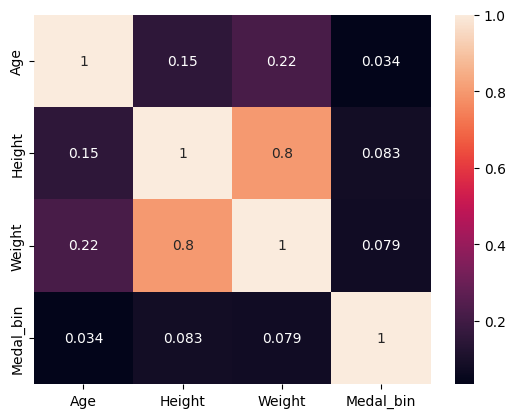

In [25]:
#Repetimos creando una columna de medalla binaria, quizas mas facil para la correlacion. 

medal_map_bin = {'No medal': 0, 'Bronze': 1, 'Silver': 1, 'Gold': 1}
df['Medal_bin'] = df['Medal'].map(medal_map_bin)

# Calcular correlación usando la nueva columna
corr = df[['Age','Height','Weight','Medal_bin']].corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()

In [26]:
#Vamos a eliminar las columnas que nos parecen que no aportan ninguna información. El caso de name es equivalente que ID, NOC equivalente a Team,
#Year y Season se puede unir en una columna ya existente llamada Games y Event es parecida a Sport.

df = df.drop(['Name', 'NOC', 'Year', 'Season', 'Event'], axis=1)

df

,ID,Sex,Age,Height,Weight,Team,Games,City,Sport,Medal,Medal_num,Medal_bin
0,1,M,24.0,180.0,80.0,China,1992 Summer,Barcelona,Basketball,No medal,0,0
1,2,M,23.0,170.0,60.0,China,2012 Summer,London,Judo,No medal,0,0
2,5,F,21.0,185.0,82.0,Netherlands,1988 Winter,Calgary,Speed Skating,No medal,0,0
3,5,F,21.0,185.0,82.0,Netherlands,1988 Winter,Calgary,Speed Skating,No medal,0,0
4,5,F,25.0,185.0,82.0,Netherlands,1992 Winter,Albertville,Speed Skating,No medal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178501,135569,M,29.0,179.0,89.0,Poland,1976 Winter,Innsbruck,Luge,No medal,0,0
178502,135570,M,27.0,176.0,59.0,Poland,2014 Winter,Sochi,Ski Jumping,No medal,0,0
178503,135570,M,27.0,176.0,59.0,Poland,2014 Winter,Sochi,Ski Jumping,No medal,0,0
178504,135571,M,30.0,185.0,96.0,Poland,1998 Winter,Nagano,Bobsleigh,No medal,0,0


In [ ]:
df.to_csv("processed_data/athlete_events_clean_final.csv", index=False)